# Capstone Project 1 Using physicochemical properties to predict wine quality 

# Cleaning data 

### Import necessary module 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np 
sns.set()

### get directory 

In [2]:
os.getcwd()
os.chdir('C:\\Users\\Administrator\\PycharmProjects\\Pheonix Egg\\Wine Project')

### load data and display

In [3]:
wine = pd.read_csv('winequality-red.csv')
wine = wine.dropna()
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### check for missing value and type of data 

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


Apparently, there is no missing value for this data set. 

### drop duplicaed row 

In [5]:
wine = wine.drop_duplicates(keep = 'first')
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


I have found that there are some duplicated rows. For the purpose of this experiment, we will treat the duplicated row as one. 

### get basic stat for each column

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


To sum up, for cleaning procedure, fortunately there is no missing value, so there is no need to clean the data. However, 
we detect some duplicated row. Since, we want to investigate more on impact of physicochemical properties on rating of wine.
The duplicated rows might illustrate the wine from the same tank. Therefore, those will be ignored for the sake of convenient and computational speed.   

# Exploratory Data Analysis (EDA)

## First EDA process: Looking for outlier. 

### Plot histogram to spot outlier virtually

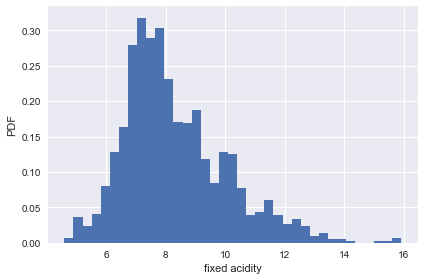

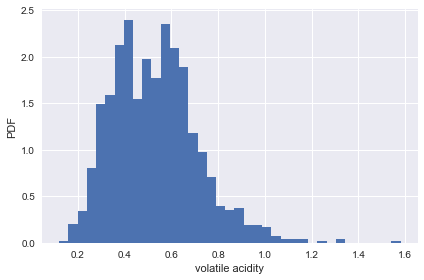

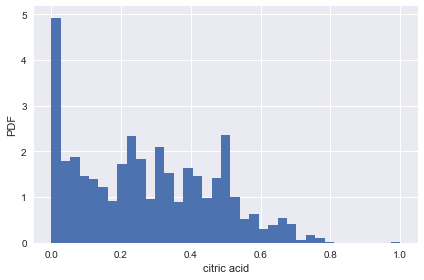

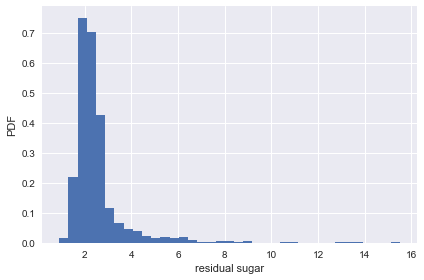

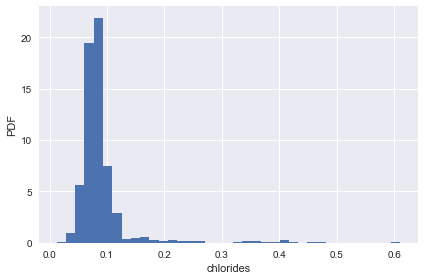

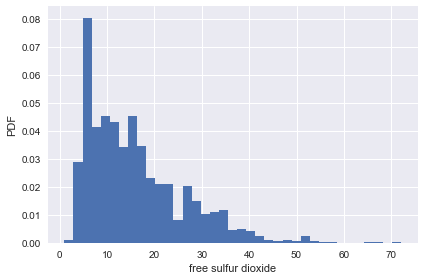

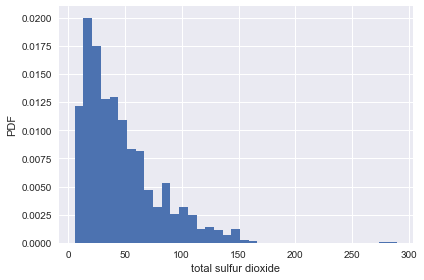

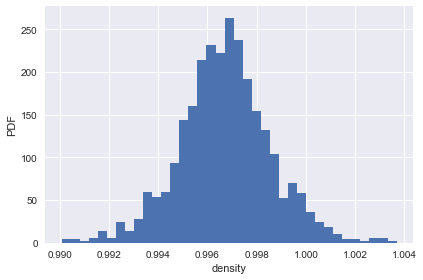

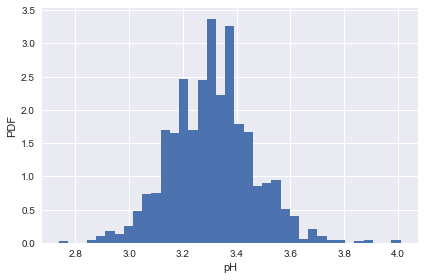

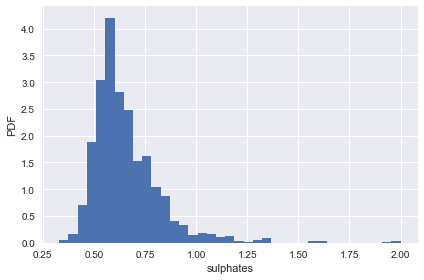

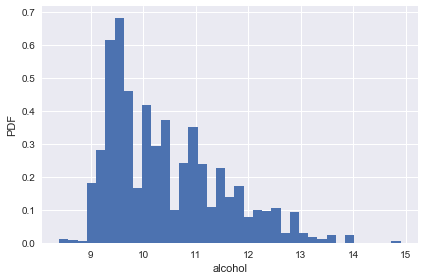

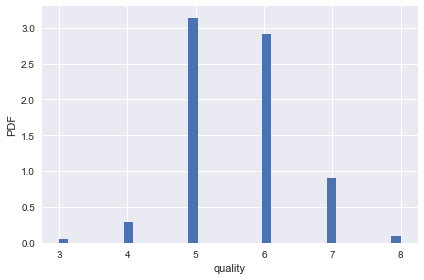

In [7]:
for column in wine.columns: 
    _ = plt.hist(wine[column], bins=37, normed=True)
    _ = plt.xlabel(column)
    _ = plt.ylabel('PDF')
    plt.tight_layout()
    plt.show()

Each histogram seems normal with some extreme value, but they are still actceptable according to the meaning of parameters. For example, total sulfur dioxide level of 270 is still possible, even though the level is almost triple the mean of the feature. Therefore, after plotting histogram, we can conclue that there is no outlier. Second, virtually checking, most feature is not normally distributed. 
 

# Is there any correlationship betweeen physicochemical properties and rating ? 

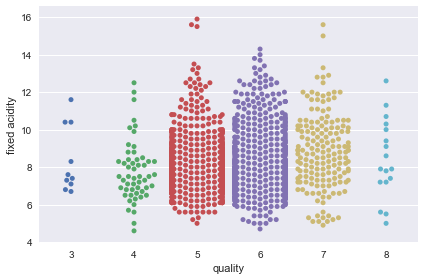

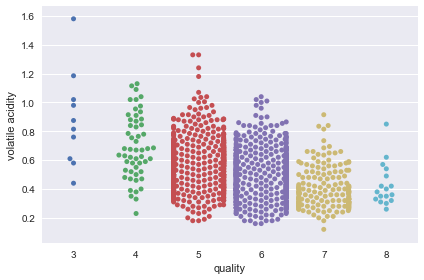

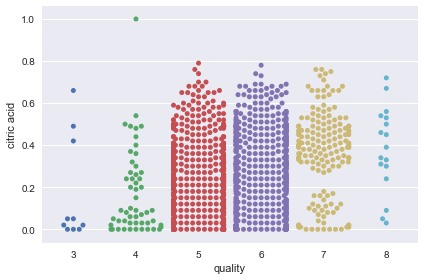

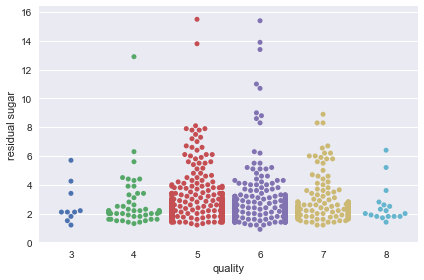

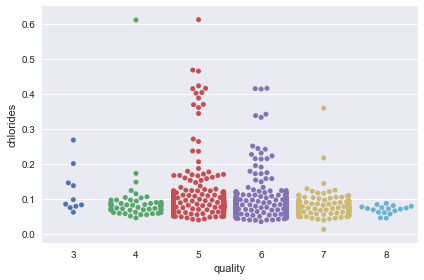

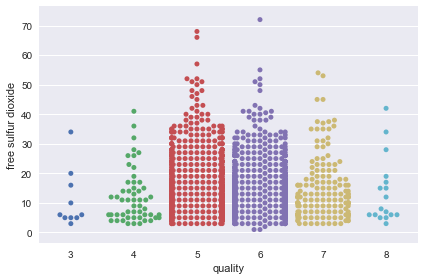

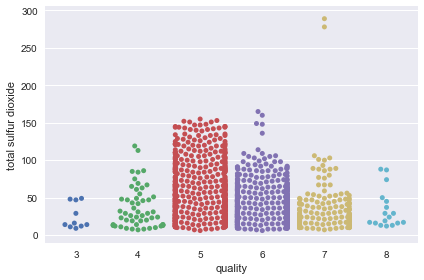

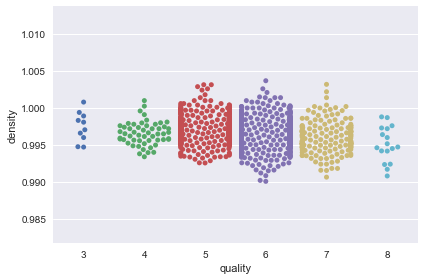

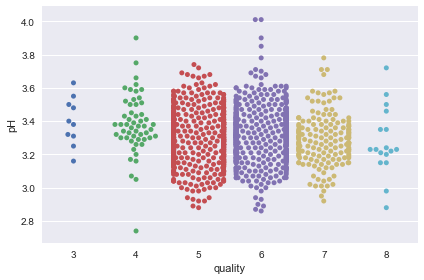

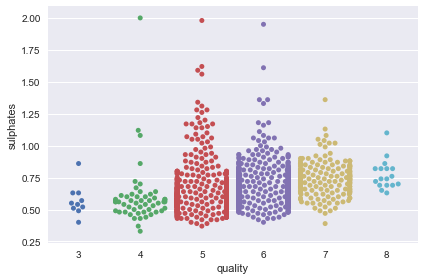

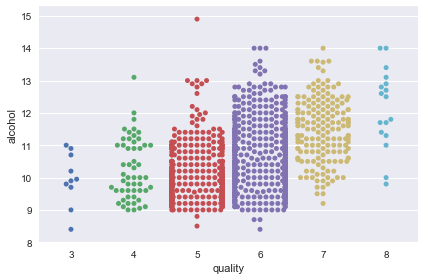

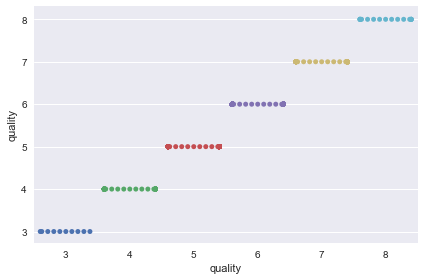

In [8]:
for column in wine.columns: 
    _ = sns.swarmplot(x="quality", y= column, data=wine)
    _ = plt.xlabel('quality')
    _ = plt.ylabel(column)
    plt.tight_layout()
    plt.show()

Looking the graphs virtually, some features have a relationship with quality such as alcohol, volatile acidity, residual sugar, sulphates, etc. we will discover the degree of correlation in the following graph. 


# discovering correlation between variable

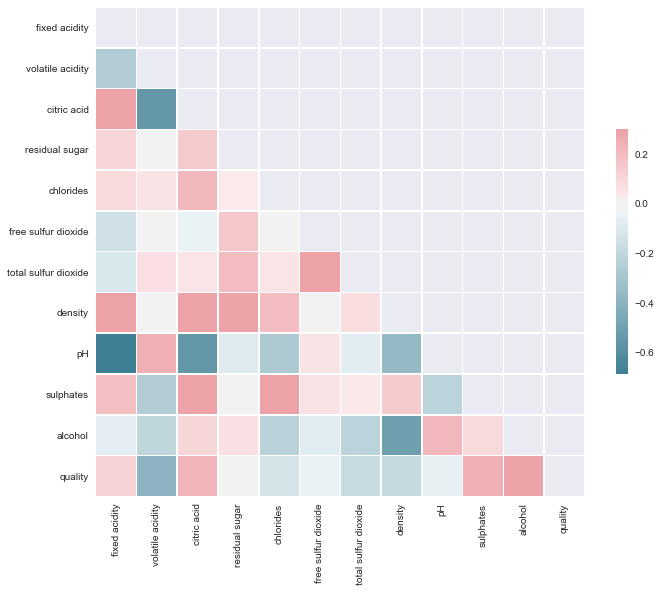

In [9]:
corr = wine.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


Variables that have correlation more than 0.15 are volatile acidity,citric acid,total sulfur dioxide,density,sulphates, and alcohol. For convenient, we will categorize these features to have a direct effect to wine quality. However, for other variables, the correlation between them and wine quality is weak, but they have a relationship with the direct effect features. For example, pH is strongly related with acid properties (0.67, 0.25,-0.55). Also, density is strongly related with alcohol (-0.5). we will plot the scatter plot to show the correlation below by quality level.   

## How do the direct effect features relate to the indirect effect features based on wine quality ? 

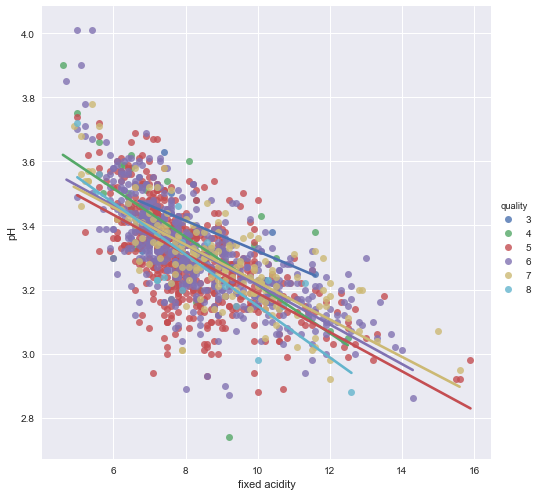

In [11]:
g = sns.lmplot(x="fixed acidity", y="pH", hue="quality",
               truncate=True, size=7, data=wine, ci = 0)
g.set_axis_labels("fixed acidity", "pH")
with sns.color_palette("PuBuGn_d") :
    plt.show()

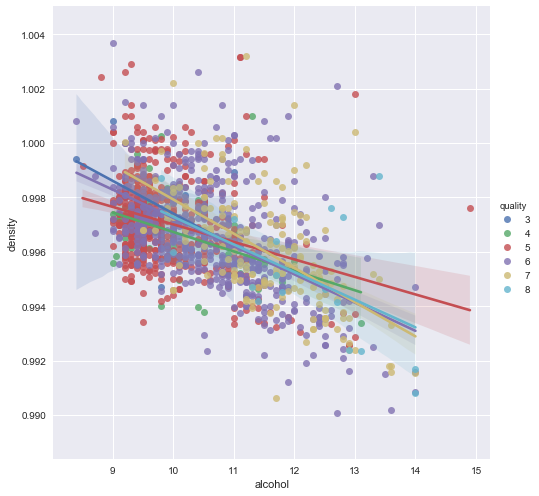

In [12]:
g = sns.lmplot(x="alcohol", y="density", hue="quality",
               truncate=True, size=7, data=wine)
g.set_axis_labels("alcohol", "density")
plt.show()

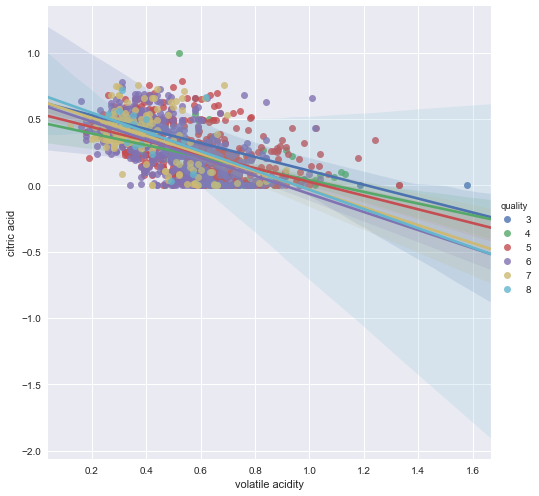

In [13]:
g = sns.lmplot(x="volatile acidity", y="citric acid",hue="quality",
                size=7, data=wine )
g.set_axis_labels("volatile acidity", "citric acid")
plt.show()

According to the graphs, for each quality level, the behavior of feature is the same among different features. For example, 
the slope of correlation between fixed acidity and pH is negative no matter what quality level it is. The same behaviur happen
in other scatter plot that we illustrated too. Therefore, To make it easier for applying logistic regression to our data. We decide
to create other variable called rating. The wine quality will be splited into two catagories zero and one. Zero parameter represents
lower quality of wine range from 3 to 5. One parameter represents 6 to 8 quality rating. By doing this, we can apply logistic regression
directly to the data and prevent our data from imbalance problem. We will talk about the reason of using logistic regression in the next procedure. 

# create new variable (rating)

In [14]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


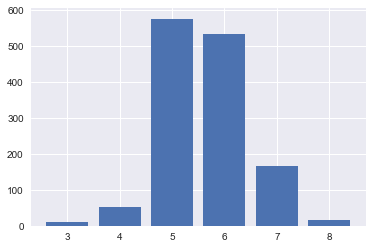

In [15]:
x=wine.quality.unique()
y= wine.quality.value_counts()
plt.bar(x,y)
plt.show()

cutting point between 5 and 6 look like a good point, so the data will be spitted into two almost equal dummy variables. 

In [16]:
wine['rating'] = wine.quality[wine.quality >= 6]
wine['rating'] = wine['rating'].replace((6,7,8),1)
wine['rating'] = wine['rating'].replace(np.nan,0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.0


In [17]:
print(len(wine['rating'][wine['rating'] == 1]))
print(len(wine['rating'][wine['rating'] == 0]))

719
640


# Is the relationship betweeen physicochemical properties and rating still the same after creating new dependent variable ?

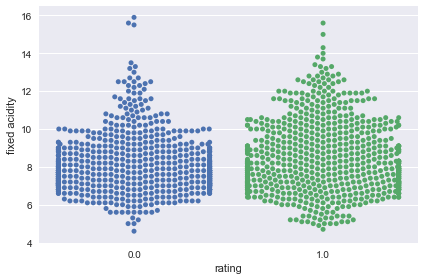

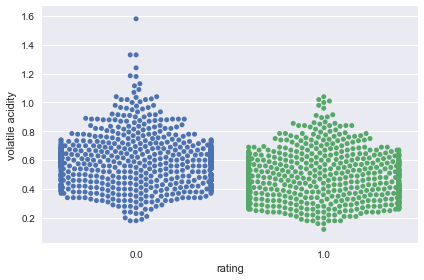

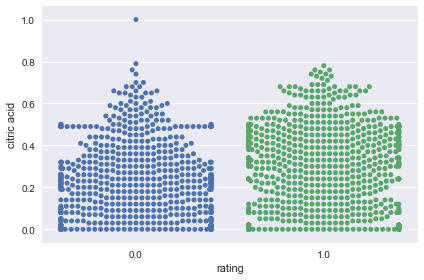

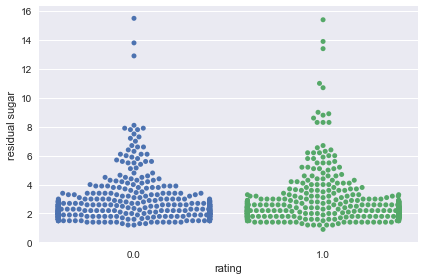

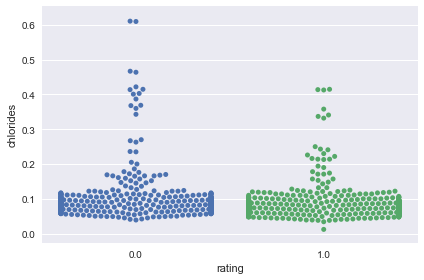

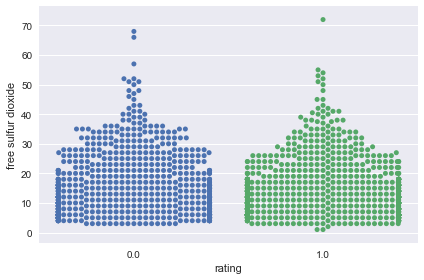

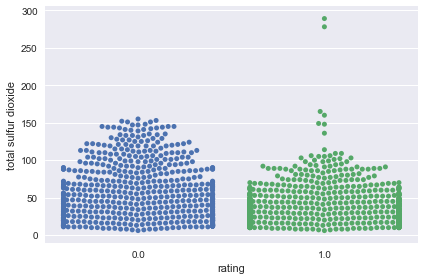

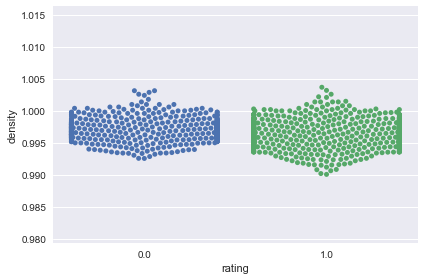

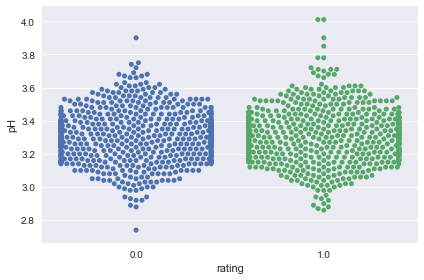

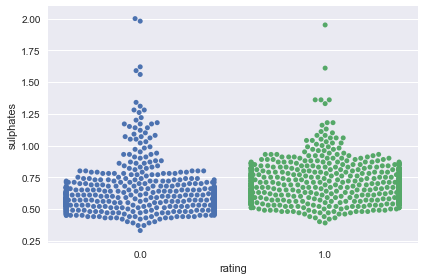

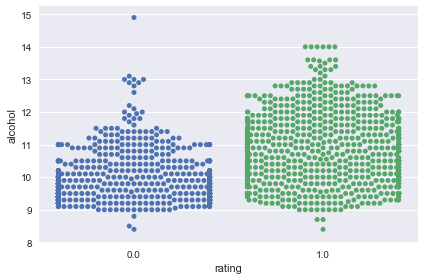

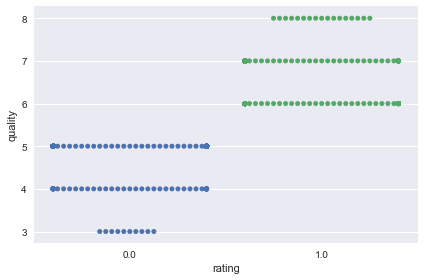

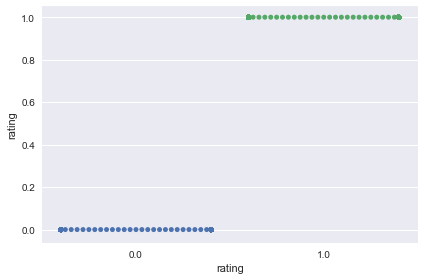

In [18]:
for column in wine.columns: 
    _ = sns.swarmplot(x="rating", y= column, data=wine)
    _ = plt.xlabel('rating')
    _ = plt.ylabel(column)
    plt.tight_layout()
    plt.show()

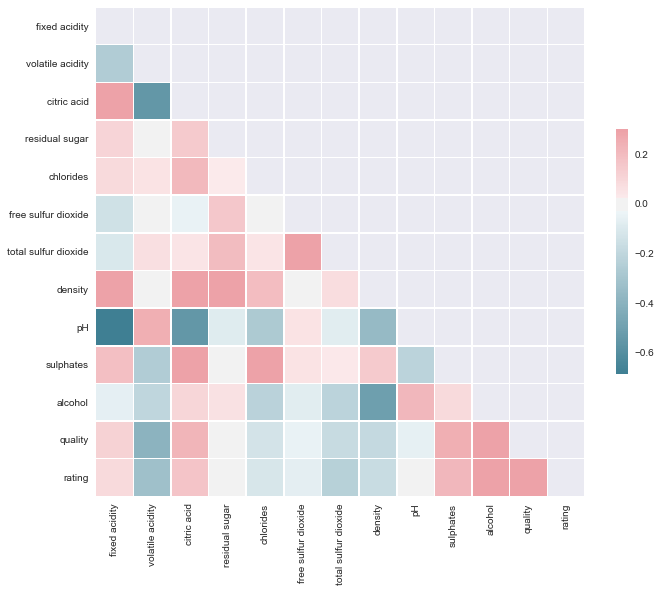

In [19]:
corr = wine.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024,0.091761
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214,-0.327195
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057,0.167903
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640,-0.002371
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988,-0.115071
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463,-0.069207
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855,-0.235046
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252,-0.168958
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245,0.004693
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835,0.211365


According to the results, the degree of relationship is somehow weaker than using original variable, but the direction of relationship
remain the same. Therefore, in the regression procedure, we will use rating variable instant of quality variable. 

# Inferential Statistics 
After we create new variable 'Rating'. We seperate wine into two catagories which have more than 5 rating and which have less than 5.
We will refer them as good wine and bad wine in the following procedure. Then, we try to run some test related to independence variables. 
The variables that have direct effect on rating are volatile acidity,citric acid,total sulfur dioxide,density,sulphates, and alcohol.
Our test will be consist of two step : 
    * plotting ecdf of each group to see whether the distribution of each group (good wine, bad wine) is the same or not 
    * using bootstrapping method to test if there is any significant difference in mean of feature between bad wine and good wine 


In [21]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

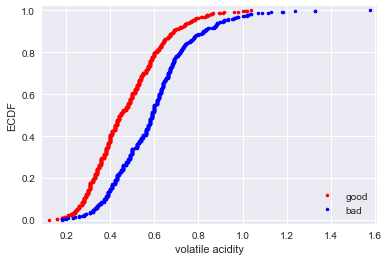

p-value = 1.0


In [22]:
# test good wine and bad wine samples on volatile acidity 
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['volatile acidity'])-np.mean(bad_wine['volatile acidity'])
x_1, y_1 = ecdf(good_wine['volatile acidity'])
x_2, y_2 = ecdf(bad_wine['volatile acidity'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')
plt.margins(0.02)
_ = plt.xlabel('volatile acidity')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['volatile acidity'],bad_wine['volatile acidity'])
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(wine['volatile acidity'], size=len(wine['volatile acidity']))
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['volatile acidity'])],
                                     bs_sample[len(good_wine['volatile acidity']):])
p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

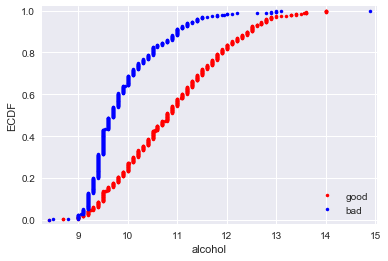

p-value = 0.0


In [23]:
# test good wine and bad wine samples on alcohol
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['alcohol'])-np.mean(bad_wine['alcohol'])

x_1, y_1 = ecdf(good_wine['alcohol'])
x_2, y_2 = ecdf(bad_wine['alcohol'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('alcohol')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['alcohol'],bad_wine['alcohol'])
bs_replicates = np.empty(10000)
for i in range(10000):
    
    bs_sample = np.random.choice(wine['alcohol'], size=len(wine['alcohol']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['alcohol'])],
                                     bs_sample[len(good_wine['alcohol']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

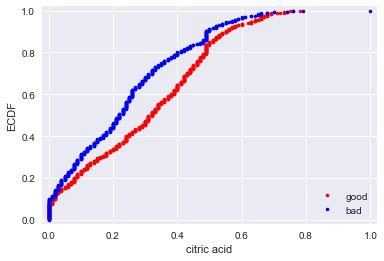

p-value = 0.0


In [24]:
# test good wine and bad wine samples on citric acid 
good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['citric acid'])-np.mean(bad_wine['citric acid'])

x_1, y_1 = ecdf(good_wine['citric acid'])
x_2, y_2 = ecdf(bad_wine['citric acid'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('citric acid')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['citric acid'],bad_wine['citric acid'])
bs_replicates = np.empty(10000)
for i in range(10000):
    
    bs_sample = np.random.choice(wine['citric acid'], size=len(wine['citric acid']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['citric acid'])],
                                     bs_sample[len(good_wine['citric acid']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

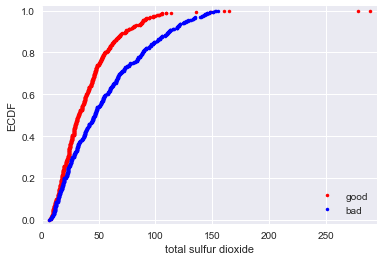

p-value = 1.0


In [25]:
# test good wine and bad wine samples on total sulfur dioxide

good_wine = wine[wine.rating == 1]
bad_wine = wine[wine.rating == 0]
diff = np.mean(good_wine['total sulfur dioxide'])-np.mean(bad_wine['total sulfur dioxide'])

x_1, y_1 = ecdf(good_wine['total sulfur dioxide'])
x_2, y_2 = ecdf(bad_wine['total sulfur dioxide'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('total sulfur dioxide')
_ = plt.ylabel('ECDF')
_ = plt.legend(('good', 'bad'), loc='lower right')
plt.show()


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1)-np.mean(data_2)
    return diff
diff = diff_of_means(good_wine['total sulfur dioxide'],bad_wine['total sulfur dioxide'])
bs_replicates = np.empty(10000)
for i in range(10000):
   
    bs_sample = np.random.choice(wine['total sulfur dioxide'], size=len(wine['pH']))
    
    bs_replicates[i] = diff_of_means(bs_sample[:len(good_wine['total sulfur dioxide'])],
                                     bs_sample[len(good_wine['total sulfur dioxide']):])

p = np.sum(bs_replicates >= diff) / 10000
print('p-value =', p)

As we can see from the results, all test that we conduct by using boothstraping method has significant result meaning that the mean of each feature of each group
is statistically significant. However, we want to dig deeper on every feature.  

# What is the result of testing mean of every feature of good wine and bad wine? 

In this section, we will use t-test as we do not know the distribution of each feature. Moreover, it will be much faster and 
easier to use t-test to test on a lot of feature. 

In [26]:
from scipy import stats
for column in wine.columns:  
    diff_mean_results = stats.ttest_ind(good_wine[column],bad_wine[column],equal_var = False)
    print(column , diff_mean_results)

fixed acidity Ttest_indResult(statistic=3.429690129057006, pvalue=0.0006224652259994661)
volatile acidity Ttest_indResult(statistic=-12.663112642586356, pvalue=1.0270784781602082e-34)
citric acid Ttest_indResult(statistic=6.301952761680176, pvalue=3.966613371490847e-10)
residual sugar Ttest_indResult(statistic=-0.08743750672371305, pvalue=0.9303367824350479)
chlorides Ttest_indResult(statistic=-4.175824466776456, pvalue=3.203283265747779e-05)
free sulfur dioxide Ttest_indResult(statistic=-2.5432543553431044, pvalue=0.011097105019784335)
total sulfur dioxide Ttest_indResult(statistic=-8.766046924165353, pvalue=6.337983150190238e-18)
density Ttest_indResult(statistic=-6.403466171052481, pvalue=2.098721635166707e-10)
pH Ttest_indResult(statistic=0.17297062036867633, pvalue=0.8627006248387413)
sulphates Ttest_indResult(statistic=7.888647833741197, pvalue=6.597118478126576e-15)
alcohol Ttest_indResult(statistic=18.742690953986735, pvalue=1.8012380348945214e-69)
quality Ttest_indResult(stati

From the results, only residual suger and pH fail to reject the test which means that the difference in mean of thoes features 
is not statistically significant. To sum up, after using ecdf , bootstraping, and t-test, the difference of mean of features between good wine and bad wine 
is statistically significant. Only two variables (residual suger and pH) is not statistically significant. 

# Logistic regression 

For this particular research, we decide to use logistic regression as a main machine learning model because of 
it's interpretation of coefficient since we do care about how to improve rating of wine 
by modifying physicochemical properties. By using other classifiers such as SVM, random forrest, etc., 
it wont be any meaningful interpretation. However, we will still imply some of those in the very end of this research in order to see how other models improve the predictability of the data.
The binary logistic model is used to estimate the probability of a binary response
based on one or more predictor (or independent) variables (features). It allows one to say that the presence 
of a risk factor increases the odds of a given outcome by a specific factor. In practical sense, the benefit 
of logistic regression is that it will indicate quantitatively change in probability of being classified 
as good wine when the physicochemical properties in wine change. For example, if we want to imporve quality 
of wine, the coefficients received by logistic regression can be used to identify which feature should be added or drop. 
We will discuss about this later.  


We will try to fit the logistic model with training data set which is seperated from test data set in order to preventing contamination and measure how well our model classify unseen data.   

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
features = wine.drop(['rating','quality'],axis = 1)
y = wine.rating
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
clf = LogisticRegression()
clf.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(clf.predict(Xtestlr), ytestlr)))


accuracy score: 0.7529411764705882


### Turning hyperparameter

Next, in order to increase accuracy score, we will try different value of C. C in logistic regression is a penalty parameter called as Regularization.
Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.
When you train a model such as a logistic regression model, you are choosing parameters that give you the best fit to the data. 
This means minimizing the error between what the model predicts for your dependent variable given your data compared to what your dependent variable actually is.


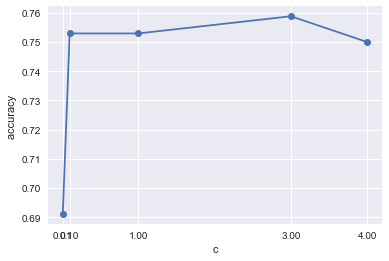

In [28]:
cs = [0.01, 0.1, 1, 3, 4]
accuracy  = []
for c in cs:
    model = LogisticRegression(C=c)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(cs, accuracy , '-o')
plt.xlabel('c')
plt.ylabel('accuracy ')
plt.xticks(cs)
plt.show()

from the graph, using C = 3 will pump up accuracy score to 0.76 which is a bit higher than using default C

However, using just accuracy score is not a good indicator for a good model since it can lead to overfitting in imbalance data set.
To be generalized, we will use log-likelihood function to measure how well logistic regression is.  

In [29]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [30]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

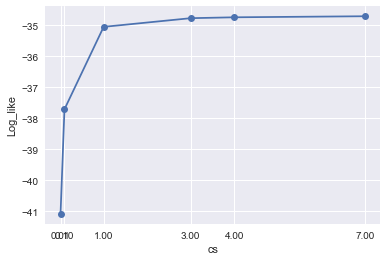

In [31]:
cs = [0.01, 0.1, 1, 3, 4 ,7]
log_like = []
for c in cs:        
    model = LogisticRegression(C=c)
    model.fit(Xlr, ylr)
    log_like.append(cv_score(model,Xtestlr,ytestlr,log_likelihood))
plt.plot(cs, log_like, '-o')
plt.xlabel('cs')
plt.ylabel('Log_like')
plt.xticks(cs)
plt.show()

The result consist with accuracy score. Log-likelihood score suggests C = 3 to be the best parameter for this data. 

#### Using black box (GridSearchCV) to find the best parameter
As we try to use different method to measure how well the logistic regression fit our data, we apply cross validation process  and turning at the same time by using built in function GridSearchCV in sklearn to find the best parameter for the model.   

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
c_space = [0.01, 0.1, 1, 3, 3.1 ,3.5,4,7]
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(Xlr, ylr)
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3}
Best score is 0.7379784102060843


The result also consist with our previous results. 3 is still the best parameter for C.  

### Features modification 

According to the result from previous chapter, residual sugar and pH do not have relationship with wine rating. In order to investigate
this subject, we will try to run the model using all features and excluded residual sugar and pH. 

In [33]:
features = wine.drop(['rating','quality'],axis = 1)
y = wine.rating
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
clf1 = LogisticRegression(C=3)
clf1.fit(Xlr, ylr)
print  ("score of test data:  {:f}".format(accuracy_score(clf1.predict(Xtestlr), ytestlr)))

score of test data:  0.758824


In [34]:
features = wine.drop(['rating','quality','residual sugar', 'pH'],axis = 1)
y = wine.rating
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
clf2 = LogisticRegression(C=3)
clf2.fit(Xlr, ylr)
print  ("score of test data:  {:f}".format(accuracy_score(clf2.predict(Xtestlr), ytestlr)))

score of test data:  0.750000


According to the results above, dropping residual sugar and pH reduces accuracy. Therefore, the model with all features is prefered 
than the model without residual sugar and pH coefficient. 

## Performance Metrics

### Confusion matrix 

Confusion matrix is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. We will measure the error of our model by using confusion matrix.

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = wine.rating
features = wine.drop(['rating','quality'],axis = 1)
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
clf1 = LogisticRegression(C=3)
clf1.fit(Xlr, ylr)
# Predict the labels of the test data: y_pred
y_pred = clf1.predict(Xtestlr)
# Generate the confusion matrix and classification report
print(confusion_matrix(ytestlr, y_pred))
print(classification_report(ytestlr, y_pred))

[[113  30]
 [ 52 145]]
             precision    recall  f1-score   support

        0.0       0.68      0.79      0.73       143
        1.0       0.83      0.74      0.78       197

avg / total       0.77      0.76      0.76       340



### ROC AUC

ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
The true-positive rate is also known as sensitivity, recall or probability of detection[2] in machine learning. 
The false-positive rate is also known as the fall-out or probability of false alarm.
To sum up, The higher ROC AUC is the better the model will predict unknown data. 


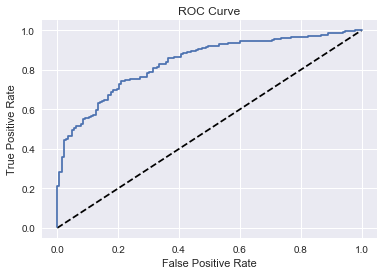

roc score: 0.8358240744027545


In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf1.predict_proba(Xtestlr)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytestlr, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("roc score: {}".format(roc_auc_score(ytestlr, y_pred_prob)))

### PR CURVE

We will also plot precision and recall curve as well

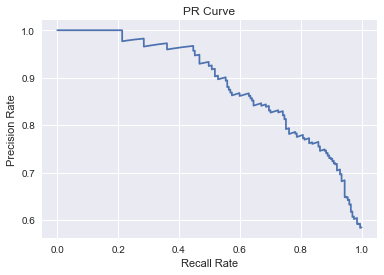

PR score: 0.8860298237126274


In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf1.predict_proba(Xtestlr)[:,1]
# Generate PR curve values: fpr, tpr, thresholds
prec, recall, thresholds = precision_recall_curve(ytestlr, y_pred_prob)
# Plot PR curve
plt.plot(recall, prec)
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('PR Curve')
plt.show()
print("PR score: {}".format(average_precision_score(ytestlr, y_pred_prob)))

## Put everything together

In [38]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
def result(model, X_train, y_train, X_test, y_test, train_result, clf_name):
    """ This function calculates different metrics to show the model's performance on both training and test data.
    This functoin also shows the confusion matrix, and plots the ROC and PR curves.
    
    Parameters
    ----------
    model (dtype: sklearn.model_selection._search.GridSearchCV) : The classifier model
    train_result (dtype: boolean): If YES, calculate results for train data
    clf_name (dtype: str): Name of the classifier
    """
    if train_result:
        y_pred_train = model.predict(X_train) # class prediction
        y_pred_train_prob = model.predict_proba(X_train) # probability of each class prediction
        print("#####################")
        print("Train data")
        print("#####################")
        print("F1: ", metrics.f1_score(y_train, y_pred_train))
        print("Cohen Kappa: ", metrics.cohen_kappa_score(y_train, y_pred_train))
        print("Brier: ", metrics.brier_score_loss(y_train, y_pred_train))
        print("LogLoss: ", metrics.log_loss(y_train, y_pred_train_prob))
        print(metrics.classification_report(y_train, y_pred_train))
        print(metrics.confusion_matrix(y_train, y_pred_train))
    else:
        pass
    
    y_pred_test = model.predict(X_test)
    y_pred_test_prob = model.predict_proba(X_test)
    print("#####################")
    print("Test data")
    print("#####################")
    print("F1: ", metrics.f1_score(y_test, y_pred_test))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
    print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
    print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, y_pred_test))
    conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    # Displaying the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24)

    plt.title('Confusion Matrix for %s' % clf_name, size=20)
    plt.xlabel('Predicted label', size=20)
    plt.ylabel('True label', size=20)
    ax.tick_params('x', labelsize = 20)
    ax.tick_params('y', labelsize = 20)
    plt.tight_layout()
    
    # ROC curve
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], 
             [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
    plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
        
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.title('Receiver Operating Characteristic for %s' % clf_name, size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="lower right", fontsize=18)
    
    # PR curve
    fig2, ax2 = plt.subplots(figsize=(8, 8))
    prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
    #pr_auc = auc(prec, recall)
    plt.plot(recall, prec, lw=1, label='Model Performance (area = %0.2f)' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])))    
    plt.xlabel('Recall', size=20)
    plt.ylabel('Precision', size=20)
    plt.title('PR Curve for %s' % clf_name, size=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.legend(loc="upper right", fontsize=18)

#####################
Test data
#####################
F1:  0.7795698924731183
Cohen Kappa:  0.5153832782895881
Brier:  0.2411764705882353
LogLoss:  0.4999267436385303
             precision    recall  f1-score   support

        0.0       0.68      0.79      0.73       143
        1.0       0.83      0.74      0.78       197

avg / total       0.77      0.76      0.76       340



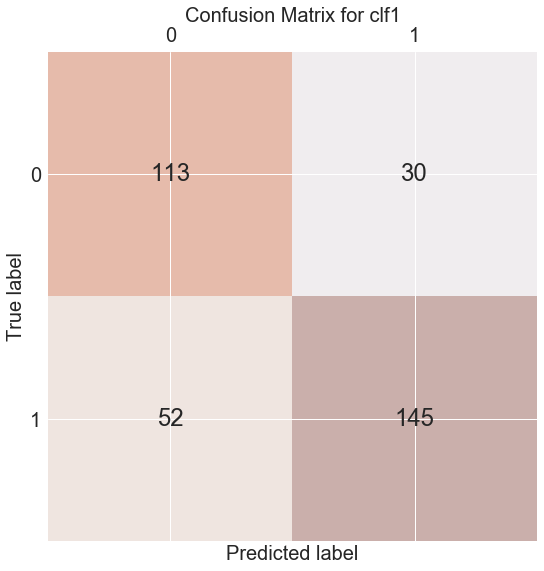

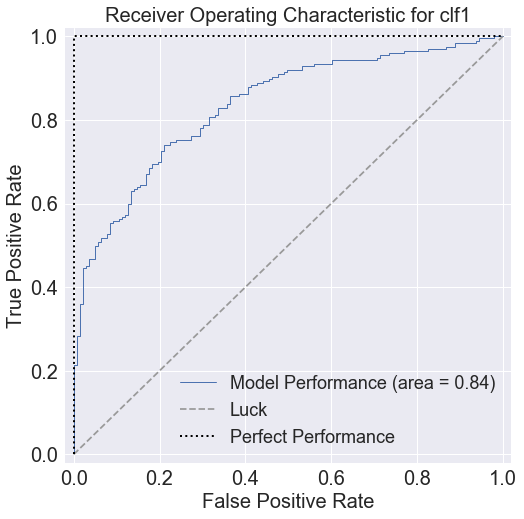

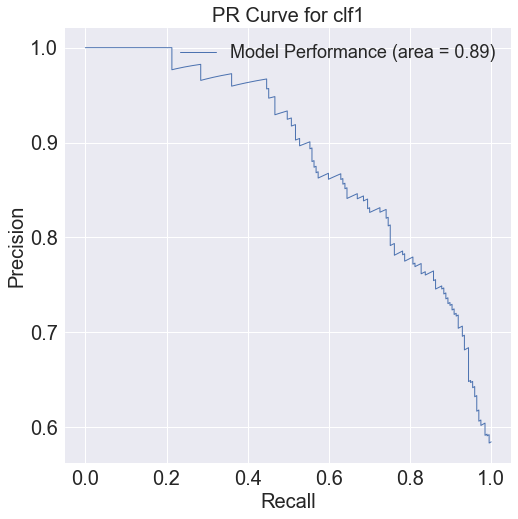

In [39]:
result(clf1, Xlr, ylr, Xtestlr, ytestlr , train_result=False, clf_name="clf1")

### model coefficient 

In [40]:
print(clf1.coef_)
print(clf1.intercept_)

[[-0.03258015 -3.11894759 -0.45769148 -0.01674858 -2.79987165  0.01363415
  -0.01327637 -1.72874178 -1.28555826  2.03273057  0.88810736]]
[-1.74560594]


In [41]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating'],
      dtype='object')

-1.74560594 -(0.03258015*fixed_acidity) - (3.11894759*volatile_acidity) -(0.45769148*citric_acid) - (0.01674858*residual_sugar)
-(2.79987165*chlorides) + (0.01363415*free_sulfur_dioxide) - (0.01327637*total_sulfur_dioxide) - (1.72874178*density)
-(1.28555826*pH) +(2.03273057*sulphates)+(0.88810736*alcohol)


#### The coefficients can be interpreted in this way. 
    *Increase in fixed acidity by 1 decrease the probability of classifying as a good wine by 3.31 percentage point ceteris paribus
    *Increase in volatile acidity by 0.01 decrease the probability of classifying as a good wine by 3.168 percentage point ceteris paribus
    *Increase in citric acid by 0.1 decrease the probability of classifying as a good wine by 4.68 percentage point ceteris paribus
    *Increase in residual sugar by 1 decrease the probability of classifying as a good wine by 1.69 percentage point ceteris paribus
    *Increase in chlorides by 0.01 decrease the probability of classifying as a good wine by 2.8 percentage point ceteris paribus
    *Increase in free sulfur dioxide by 1 increase the probability of classifying as a good wine by 1.36 percentage point ceteris paribus
    *Increase in total sulfur dioxide by 1 decrease the probability of classifying as a good wine by 1.34 percentage point ceteris paribus
    *Increase in density by 0.01 decrease the probability of classifying as a good wine by 1.744 percentage point ceteris paribus
    *Increase in pH by 0.01 decrease the probability of classifying as a good wine by 1.29 percentage point ceteris paribus
    *Increase in sulphates by 0.01 increase the probability of classifying as a good wine by 2.05 percentage point ceteris paribus
    *Increase in alcohol by 0.1 decrease the probability of classifying as a good wine by 9.29 percentage point ceteris paribus


According to the model above, there are only three variable that will increase probability of classifying as a good wine such as 
free sulfur dioxide ,sulphates,and alcohol. 


# Applying other classifier models to predict the wine quality 

## KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier()
KNN.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(KNN.predict(Xtestlr), ytestlr)))

accuracy score: 0.6323529411764706


The result is worse than the logistic regression one with accuracy of 0.632 

### Apply preprocessing method 

For classification algorithms like KNN, we measure the distances between pairs of samples and 
these distances are also influenced by the measurement units also. For example: Let’s say, 
we are applying KNN on a data set having 3 features. First feature ranging from 1-10, second 
    from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated
    based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000.
    To avoid this miss classification, we should normalize the feature variables.

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# Create train and test sets
Xlr, Xtestlr, ylr, ytestlr = train_test_split(features.values, y.values,random_state=5)
# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(Xlr, ylr)
# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(Xlr, ylr)
# Compute and print metrics
print('Accuracy with Scaling: {}'.format(accuracy_score(knn_scaled.predict(Xtestlr), ytestlr)))
print('Accuracy without Scaling: {}'.format(accuracy_score(knn_unscaled.predict(Xtestlr), ytestlr)))


Accuracy with Scaling: 0.7323529411764705
Accuracy without Scaling: 0.6323529411764706


According to the result, preprocessing procedure improves the accuracy score. The jump is around 0.1 which is critical enough for applying teh preprocess to the model.


### Turning hyperparameter

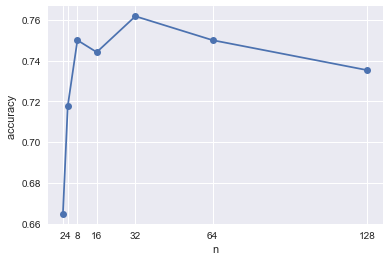

In [83]:
ns = [2, 4, 8, 16, 32, 64,128]
accuracy  = []
for n in ns:
    steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=n))]
    model = Pipeline(steps)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy ')
plt.xticks(ns)
plt.show()

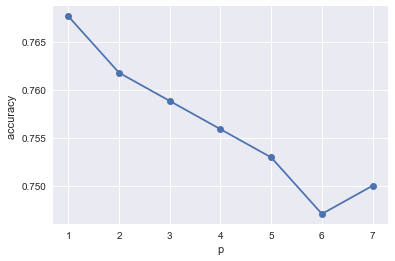

In [84]:
ps = [1, 2, 3, 4, 5, 6, 7]
accuracy  = []
for p in ps:
    steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=32, p=p))]
    model = Pipeline(steps)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ps, accuracy , '-o')
plt.xlabel('p')
plt.ylabel('accuracy ')
plt.xticks(ps)
plt.show()

From the graph, using n_neighbors = 32 and p = 1 will pump up accuracy score to 0.77 which is a bit higher than using default setting

### Using black box (GridSearchCV) to find the best paramete

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Setup the hyperparameter grid
n_space = [2, 4, 8, 16, 32, 64,128]
p_space = [1,2,3,4,5,6,7]
param_grid = {'knn__n_neighbors': n_space,'knn__p': p_space}
# Instantiate a KNeighbors classifier: knn
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
# Instantiate the GridSearchCV object:knn_cv
knn_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Fit it to the data
knn_cv.fit(Xlr, ylr)
# Print the tuned parameters and score
print("Tuned KNeighbors classifier Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNeighbors classifier Parameters: {'knn__n_neighbors': 128, 'knn__p': 1}
Best score is 0.7428851815505397


From grid search, n_neighbors = 128 and p = 1 is the best parameters 

### Compare two model 

In [87]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 32, p = 1))]
KNN = Pipeline(steps)
KNN.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(KNN.predict(Xtestlr), ytestlr)))

accuracy score: 0.7676470588235295


In [88]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 128, p = 1))]
KNN = Pipeline(steps)
KNN.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(KNN.predict(Xtestlr), ytestlr)))

accuracy score: 0.7411764705882353


The different is tiny, so we pick n_neighbors = 32, p = 1 for the sake of computational speed

### Final KNeighborsClassifier model 

In [89]:
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors = 32, p = 1))]
KNN = Pipeline(steps)
KNN.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(KNN.predict(Xtestlr), ytestlr)))

accuracy score: 0.7676470588235295


### Print result 

#####################
Test data
#####################
F1:  0.7870619946091645
Cohen Kappa:  0.533550986385107
Brier:  0.2323529411764706
LogLoss:  0.5085826325168699
             precision    recall  f1-score   support

        0.0       0.69      0.80      0.74       143
        1.0       0.84      0.74      0.79       197

avg / total       0.78      0.77      0.77       340



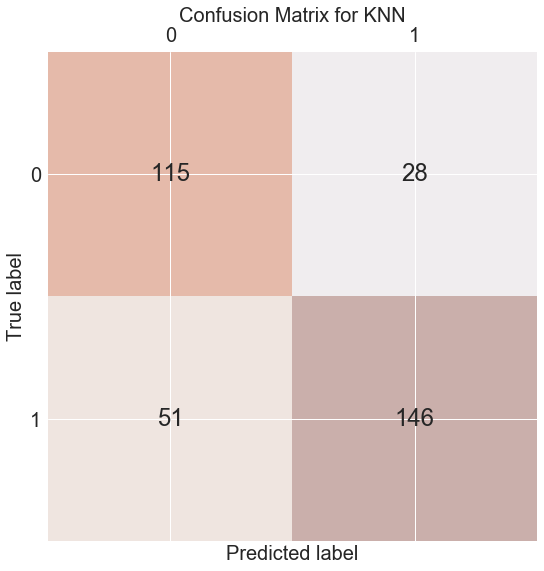

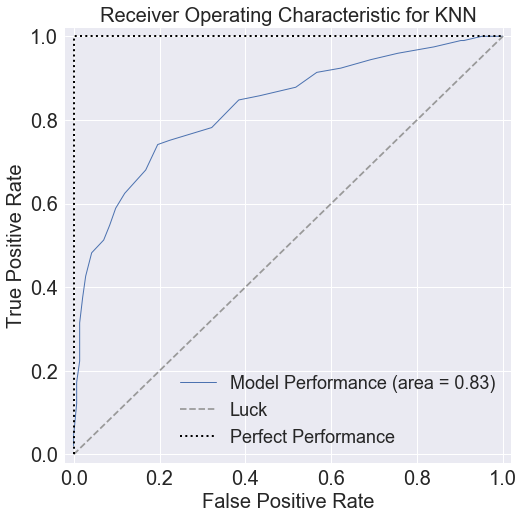

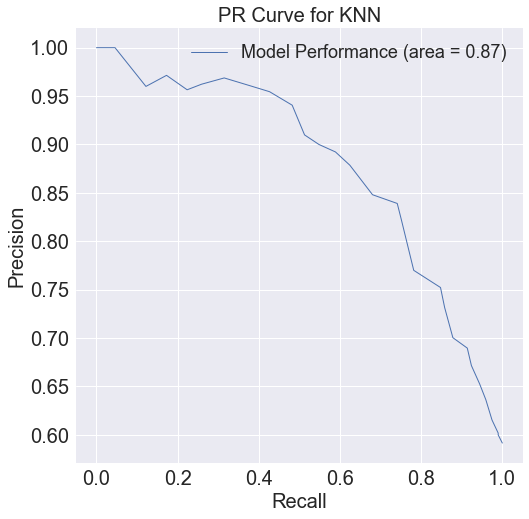

In [90]:
result(KNN, Xlr, ylr, Xtestlr, ytestlr , train_result=False, clf_name="KNN")

## RandomForestClassifier

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier(random_state = 16)
RF.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(RF.predict(Xtestlr), ytestlr)))



accuracy score: 0.7558823529411764


The result is better than the logistic regression one with accuracy of 0.756

### Turning hyperparameter

We will pick the best parameter one by one due to computational difficulty (4 GB of RAM).

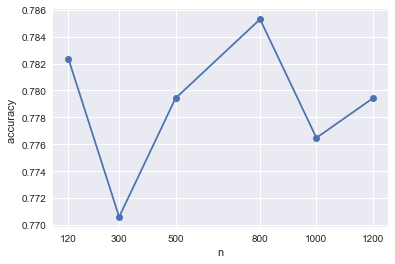

In [52]:
ns = [120,300,500,800,1000,1200]
accuracy  = []
for n in ns:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy ')
plt.xticks(ns)
plt.show()

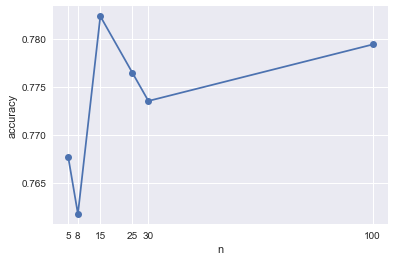

In [53]:
ns = [5,8,15,25,30,100]
accuracy  = []
for n in ns:
    model = RandomForestClassifier(n_estimators = 1000, max_depth=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(ns)
plt.show()

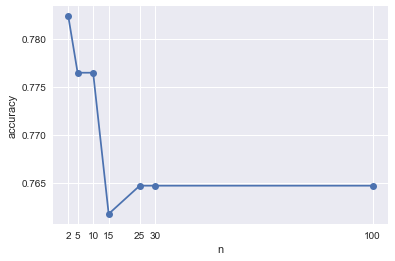

In [54]:
ns = [2,5,10,15,25,30,100]
accuracy  = []
for n in ns:
    model = RandomForestClassifier(n_estimators = 1000, max_depth= 30, min_samples_split=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(ns)
plt.show()

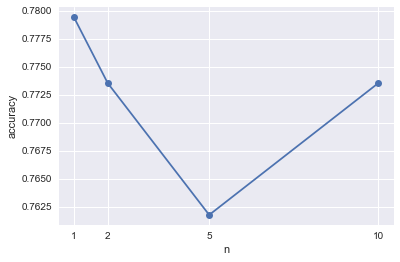

In [55]:
ns = [1,2,5,10]
accuracy  = []
for n in ns:
    model = RandomForestClassifier(n_estimators = 1000, max_depth= 30, min_samples_split=10 ,min_samples_leaf=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(ns)
plt.show()

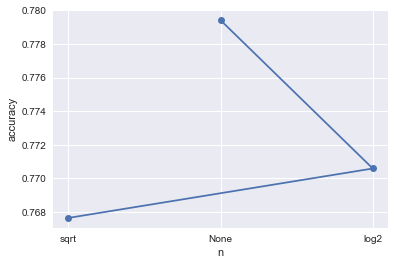

In [56]:
ns = ['log2','sqrt',None]
accuracy  = []
for n in ns:
    model = RandomForestClassifier(n_estimators = 1000, max_depth= 30, min_samples_split=10 
                                   ,min_samples_leaf=1, max_features=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(ns)
plt.show()

From the graph, using n_estimators = 1000, max_depth= 30, min_samples_split=10 ,min_samples_leaf=1 will be the best parameters for this particular data. 

### Final RandomForestClassifier model

In [57]:
RF = RandomForestClassifier(n_estimators = 1000, max_depth= 30, min_samples_split=10 ,min_samples_leaf=1 )
RF.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(RF.predict(Xtestlr), ytestlr)))

accuracy score: 0.7647058823529411


### Print result 

#####################
Test data
#####################
F1:  0.7826086956521738
Cohen Kappa:  0.5289717036677866
Brier:  0.23529411764705882
LogLoss:  0.4881140664562356
             precision    recall  f1-score   support

        0.0       0.69      0.81      0.74       143
        1.0       0.84      0.73      0.78       197

avg / total       0.78      0.76      0.77       340



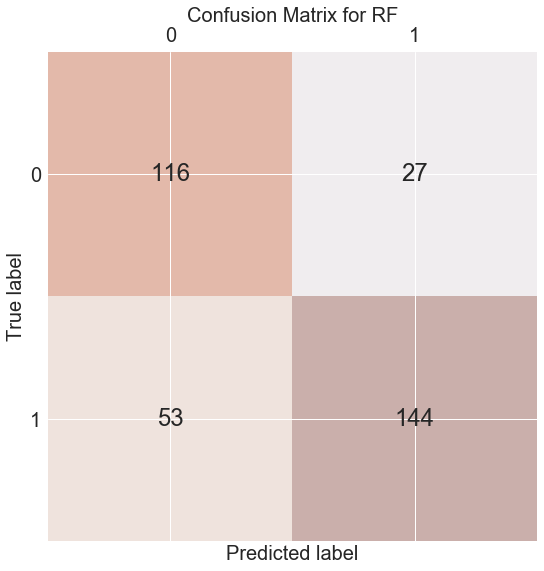

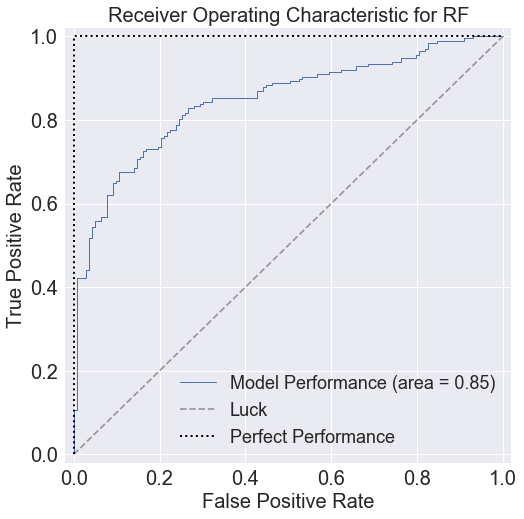

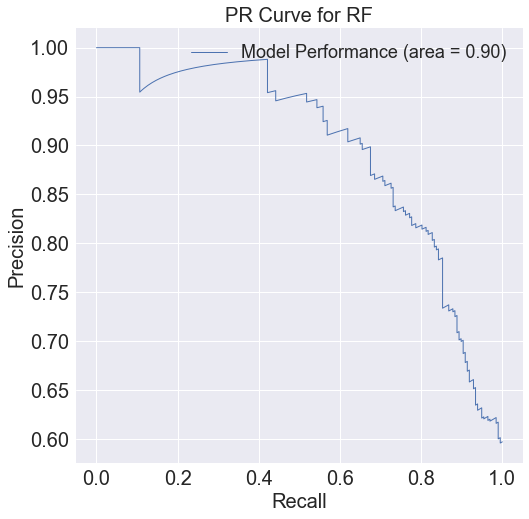

In [58]:
result(RF, Xlr, ylr, Xtestlr, ytestlr , train_result=False, clf_name="RF")

## AdaBoostClassifier

In [131]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ADA = AdaBoostClassifier()
ADA.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(ADA.predict(Xtestlr), ytestlr)))


accuracy score: 0.75


The accuracy score is similar to logistic regression 

### Turning hyperparameters 

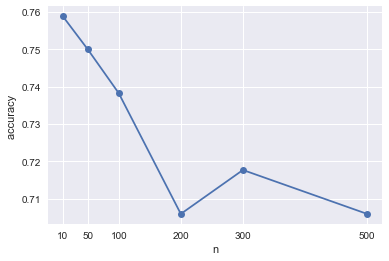

In [60]:
ns = [10,50,100,200,300,500]
accuracy  = []
for n in ns:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy ')
plt.xticks(ns)
plt.show()

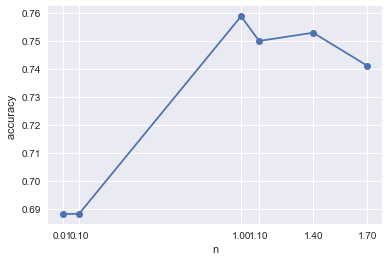

In [61]:
ns = [0.01,0.1,1,1.1,1.4,1.7]
accuracy  = []
for n in ns:
    model = AdaBoostClassifier(n_estimators=10, learning_rate=n)
    model.fit(Xlr, ylr)
    accuracy.append(accuracy_score(model.predict(Xtestlr), ytestlr))
plt.plot(ns, accuracy , '-o')
plt.xlabel('n')
plt.ylabel('accuracy ')
plt.xticks(ns)
plt.show()

n_estimators=10, learning_rate=1 is the best parameters. 

### Final AdaboothClassifier model 

In [62]:
ADA = AdaBoostClassifier(n_estimators=10, learning_rate=1)
ADA.fit(Xlr, ylr)
print("accuracy score: {}".format(accuracy_score(ADA.predict(Xtestlr), ytestlr)))

accuracy score: 0.7588235294117647


#####################
Test data
#####################
F1:  0.7759562841530055
Cohen Kappa:  0.5180972793583849
Brier:  0.2411764705882353
LogLoss:  0.6382432848936095
             precision    recall  f1-score   support

        0.0       0.68      0.81      0.74       143
        1.0       0.84      0.72      0.78       197

avg / total       0.77      0.76      0.76       340



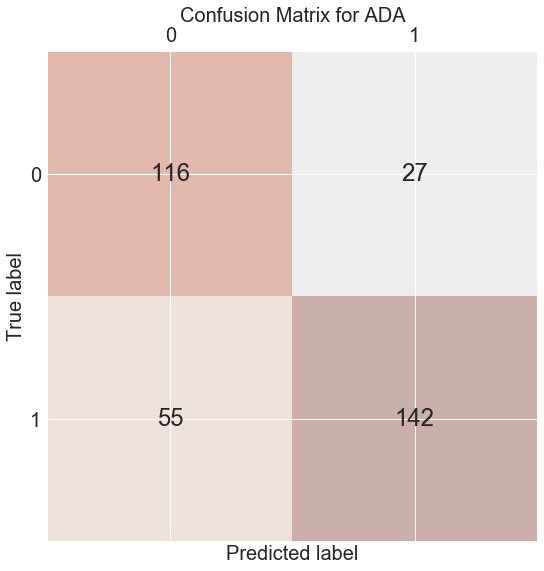

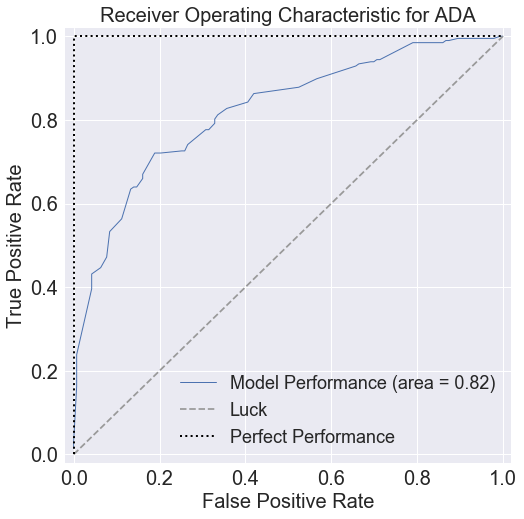

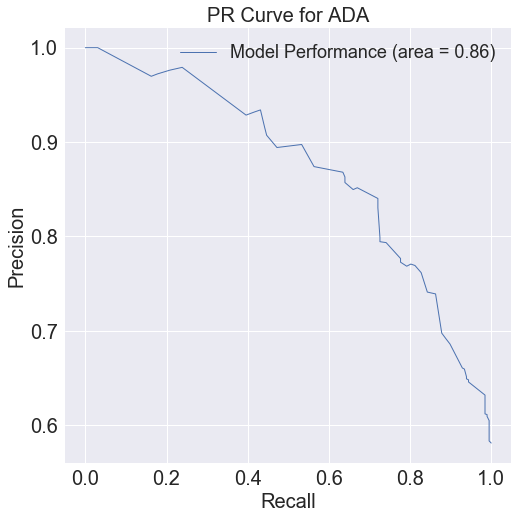

In [63]:
result(ADA, Xlr, ylr, Xtestlr, ytestlr , train_result=False, clf_name="ADA")

# Compare ROC AUC 

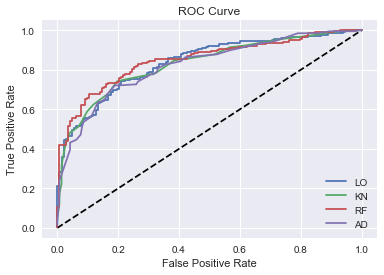

roc score: 0.8358240744027545
roc score: 0.8301977210606653
roc score: 0.8476447410457562
roc score: 0.822122040396152


In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.plot([0, 1], [0, 1], 'k--')
y_pred_prob = clf1.predict_proba(Xtestlr)[:,1]
fpr, tpr, thresholds = roc_curve(ytestlr, y_pred_prob)
plt.plot(fpr, tpr, label='LO')
y_pred_prob_1 = KNN.predict_proba(Xtestlr)[:,1]
fpr_1, tpr_1, thresholds = roc_curve(ytestlr, y_pred_prob_1)
plt.plot(fpr_1, tpr_1, label='KN')
y_pred_prob_2 = RF.predict_proba(Xtestlr)[:,1]
fpr_2, tpr_2, thresholds = roc_curve(ytestlr, y_pred_prob_2)
plt.plot(fpr_2, tpr_2, label='RF')
y_pred_prob_3 = ADA.predict_proba(Xtestlr)[:,1]
fpr_3, tpr_3, thresholds = roc_curve(ytestlr, y_pred_prob_3)
plt.plot(fpr_3, tpr_3, label='AD')
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("roc score: {}".format(roc_auc_score(ytestlr, y_pred_prob)))
print("roc score: {}".format(roc_auc_score(ytestlr, y_pred_prob_1)))
print("roc score: {}".format(roc_auc_score(ytestlr, y_pred_prob_2)))
print("roc score: {}".format(roc_auc_score(ytestlr, y_pred_prob_3)))

The graph shows that the random forrest model out preform other models in term of predictability with ROC score 0.8489226509531078. 

## Compare PR Curve 

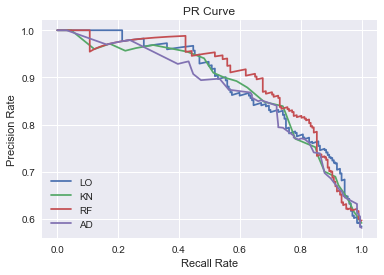

PR score: 0.8860298237126274
PR score: 0.8719587583823536
PR score: 0.8968161609220517
PR score: 0.8629936637082314


In [92]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
y_pred_prob = clf1.predict_proba(Xtestlr)[:,1]
prec, recall, thresholds = precision_recall_curve(ytestlr, y_pred_prob)
plt.plot(recall, prec, label='LO')
y_pred_prob_1 = KNN.predict_proba(Xtestlr)[:,1]
prec_1, recall_1, thresholds = precision_recall_curve(ytestlr, y_pred_prob_1)
plt.plot(recall_1, prec_1, label='KN')
y_pred_prob_2 = RF.predict_proba(Xtestlr)[:,1]
prec_2, recall_2, thresholds = precision_recall_curve(ytestlr, y_pred_prob_2)
plt.plot(recall_2, prec_2, label='RF')
y_pred_prob_3 = ADA.predict_proba(Xtestlr)[:,1]
prec_3, recall_3, thresholds = precision_recall_curve(ytestlr, y_pred_prob_3)
plt.plot(recall_3, prec_3, label='AD')
plt.legend(loc="lower left")
plt.xlabel('Recall Rate')
plt.ylabel('Precision Rate')
plt.title('PR Curve')
plt.show()
print("PR score: {}".format(average_precision_score(ytestlr, y_pred_prob)))
print("PR score: {}".format(average_precision_score(ytestlr, y_pred_prob_1)))
print("PR score: {}".format(average_precision_score(ytestlr, y_pred_prob_2)))
print("PR score: {}".format(average_precision_score(ytestlr, y_pred_prob_3)))

The graph also shows that the random forrest model out preform other models in term of predictability with PR score 0.8976765711872197. 